## Sample PICARRO run

This notebook emulates the Excel workflow that was proposed by van Geldern (2012).

### Reading the raw data and producing a run summary

First of all, we've got to read the raw data from PICARRO after one analysis.
We check first whether a run line is *empty*.

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


In [2]:
import Picarro as pica
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from random import random

In [3]:
run2,d2H,SD_coeffs_H = pica.initialTreatment("example_data/HKDS2009_IsoWater_20191010_094459.csv",iso = "O")

No empty cells. Proceeding...
<class 'pandas.core.frame.DataFrame'>
     fun: 0.7371103889409546
     jac: array([-2.86802649e-04,  3.65975499e-03, -3.48632783e-03, -5.58108836e-03,
        2.38309801e-03,  4.88220900e-03, -6.25551492e-03, -1.97117224e-01,
        1.80729389e-01, -7.16009177e-01])
 message: 'Optimization terminated successfully.'
    nfev: 181
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([0.85972078, 0.96557667, 0.98212196, 0.9891532 , 0.99261086,
       0.99696441, 0.99784955, 1.        , 1.        , 1.        ])


/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator/Picarro.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col2] = df[col1] - df["Line"]*params["slope"]
/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator/Picarro.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col1] = df[col2]*params["slope"]+params["intercept"]


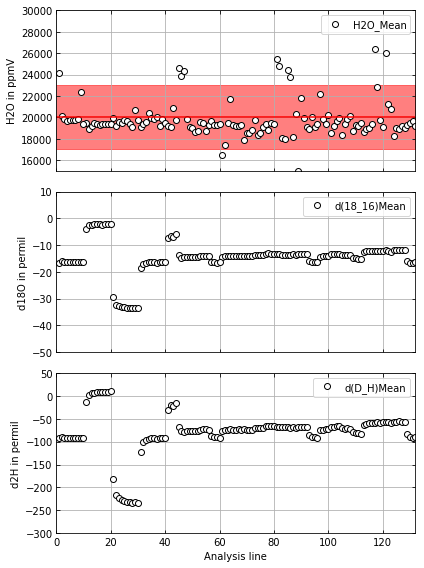

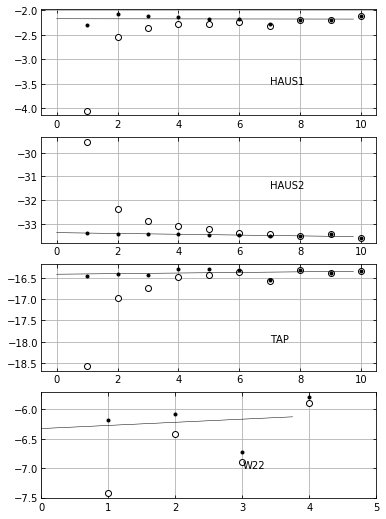

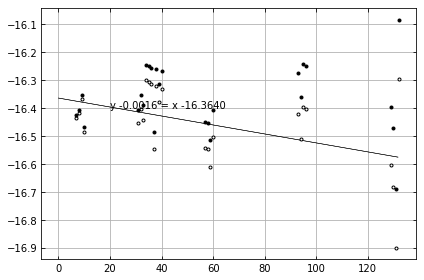

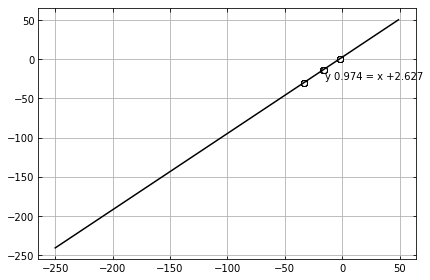

In [4]:
run2,d2H,SD_coeffs_H = pica.secondTreatment(run2,d2H,iso = "O",option ="Plot")

In [6]:
pica.getMeanSDs(d2H,isotope = "O")

,Identifier 1,Identifier 2,d18O_raw,stdev. raw,d18O memory,stdev. memory,d18O drift,stdev. drift,d18O vsmow,stdev. vsmow
0,GNS-02,TR,-14.37400,0.429829,-14.786578,0.171915,-14.711889,0.173531,-11.705772,0.169063
1,GNS-03,TR,-14.34850,0.023445,-14.342605,0.017873,-14.261490,0.019929,-11.266971,0.019416
2,GNS-04,TR,-14.00600,0.005292,-13.989502,0.024849,-13.901963,0.023053,-10.916701,0.022460
3,GNS-05,TR,-14.17350,0.182517,-14.064449,0.069377,-13.964060,0.071436,-10.977200,0.069596
4,GNS-06,TR,-14.08075,0.052829,-14.084201,0.054421,-13.977387,0.055140,-10.990183,0.053721
5,GNS-07,TR,-14.10950,0.028172,-14.111053,0.028704,-13.997814,0.029270,-11.010084,0.028516
6,GNS-08,TR,-13.61650,0.068476,-13.594684,0.059084,-13.475020,0.059036,-10.500751,0.057516
7,GNS-09,TR,-13.15950,0.026901,-13.137064,0.031820,-13.010976,0.030286,-10.048656,0.029506
8,GNS-10,TR,-13.48550,0.075954,-13.499819,0.068073,-13.367305,0.066463,-10.395811,0.064751
9,GNS-11,TR,-13.59300,0.220854,-13.593531,0.227218,-13.454592,0.227279,-10.480850,0.221427


In [7]:
SD_coeffs_H

{'combined_sd': 0.19112449239347806,
 'date': 'None',
 'mem_coeffs': {1: 0.8597207775940884,
  2: 0.9655766675175949,
  3: 0.98212196476896,
  4: 0.989153200221192,
  5: 0.9926108601939015,
  6: 0.9969644111469516,
  7: 0.9978495546372428,
  8: 1.0,
  9: 1.0,
  10: 1.0}}

In [ ]:
run2